In [13]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

Imagen:


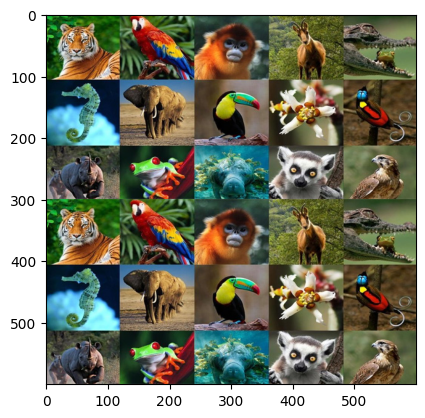

In [14]:
print('Imagen:')
image=io.imread("https://i.ibb.co/D7kQQ3n/animals.jpg")
plt.imshow(image,vmin=0,vmax=1)
plt.show()

Template:


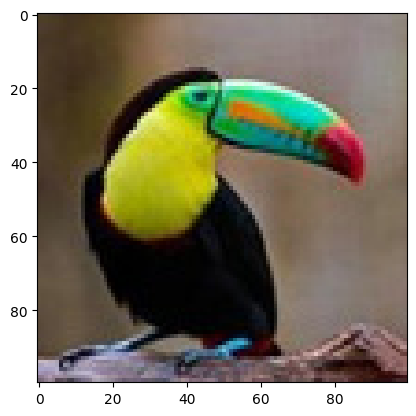

In [15]:
print('Template:')
template=io.imread("https://i.ibb.co/mJxXLhL/template.jpg")
plt.imshow(template,vmin=0,vmax=1)
plt.show()

In [16]:
def templateMatching(image,template):
  # Obteniendo las Matrices RGB de la imagen y el template
  R = image[:,:,0]
  G = image[:,:,1]
  B = image[:,:,2]
  TR = template[:,:,0]
  TG = template[:,:,1]
  TB = template[:,:,2]

  rows=len(R)-len(TR)
  cols=len(R[0])-len(TR[0])

  for i in range(rows):
    for j in range(cols):        
      imageSectionR=R[i:i+len(TR), j:j+len(TR[0])]
      imageSectionG=G[i:i+len(TG), j:j+len(TG[0])]
      imageSectionB=B[i:i+len(TB), j:j+len(TB[0])]

      # Calculando Distancia euclidiana      
      distR = np.sqrt(np.sum(np.square(imageSectionR-TR)))
      distG = np.sqrt(np.sum(np.square(imageSectionG-TG)))
      distB = np.sqrt(np.sum(np.square(imageSectionB-TB)))
      distT=distR+distG+distB

      # Se pintan los cuadros que coinciden de Azul
      if(distT<1000):
        for x in range(len(TR[0])):
          for y in range(len(TR[0])):
            image[i+x][j+y][2]+=100
        print(distT)
        print(i,j)

  return image

In [17]:
respuesta=templateMatching(image,template)

693.1044068215801
109 258
945.6524457957544
409 258


Respuesta (Se marco de azul el matching):


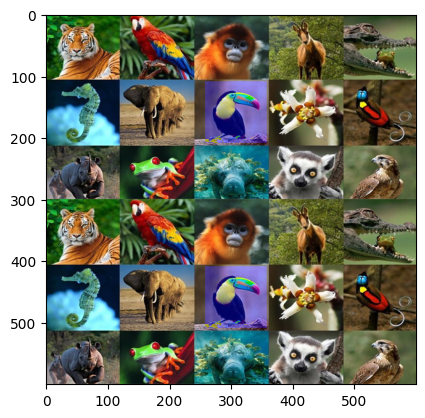

In [18]:
print('Respuesta (Se marco de azul el matching):')
plt.imshow(image,vmin=0,vmax=1)
plt.show()